In [1]:
# 실습에 필요한 모듈
from IPython.display import display, Image

In [2]:
# 표 데이터를 다룰 pandas 모듈
import pandas as pd

In [3]:
# 데이터 확인
macbook = pd.read_csv('~/Desktop/study_record_of_aiffel/EXPLORATION_RS5/data/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


In [4]:
# 데이터 시각화
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

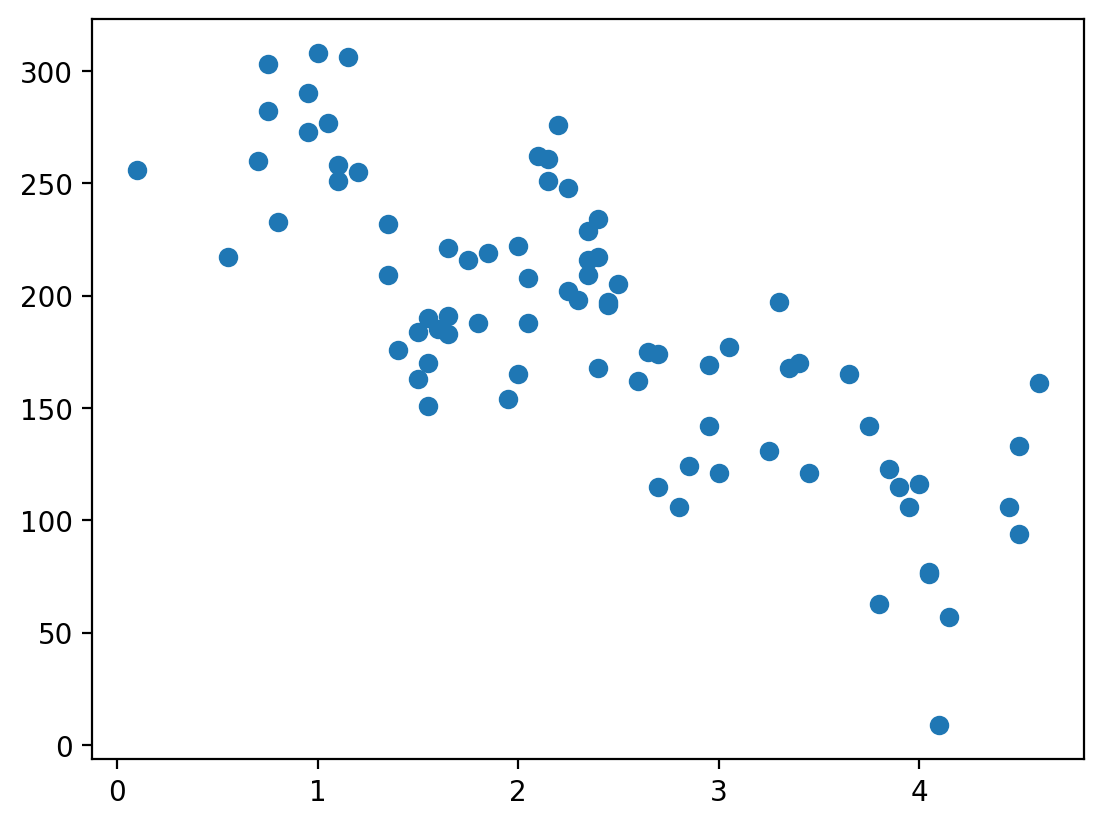

In [5]:
# 2차원 그래프 그리기 (사용년수와 가격간의 관계 그래프)
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [6]:
# 상관계수 구하기
import numpy as np

# np.corrcoef(x, y)를 사용합니다.
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

In [7]:
# Model 만들어보기; 사용년수를 입력 받아 중고가를 예측
x = macbook["used_years"].values
y = macbook["price"].values

In [8]:
# 1차함수 선언
def model(x, w, b):
    y = w * x + b
    return y

In [9]:
# 모델 테스트 실행
model(x=5, w=2, b=1)

11

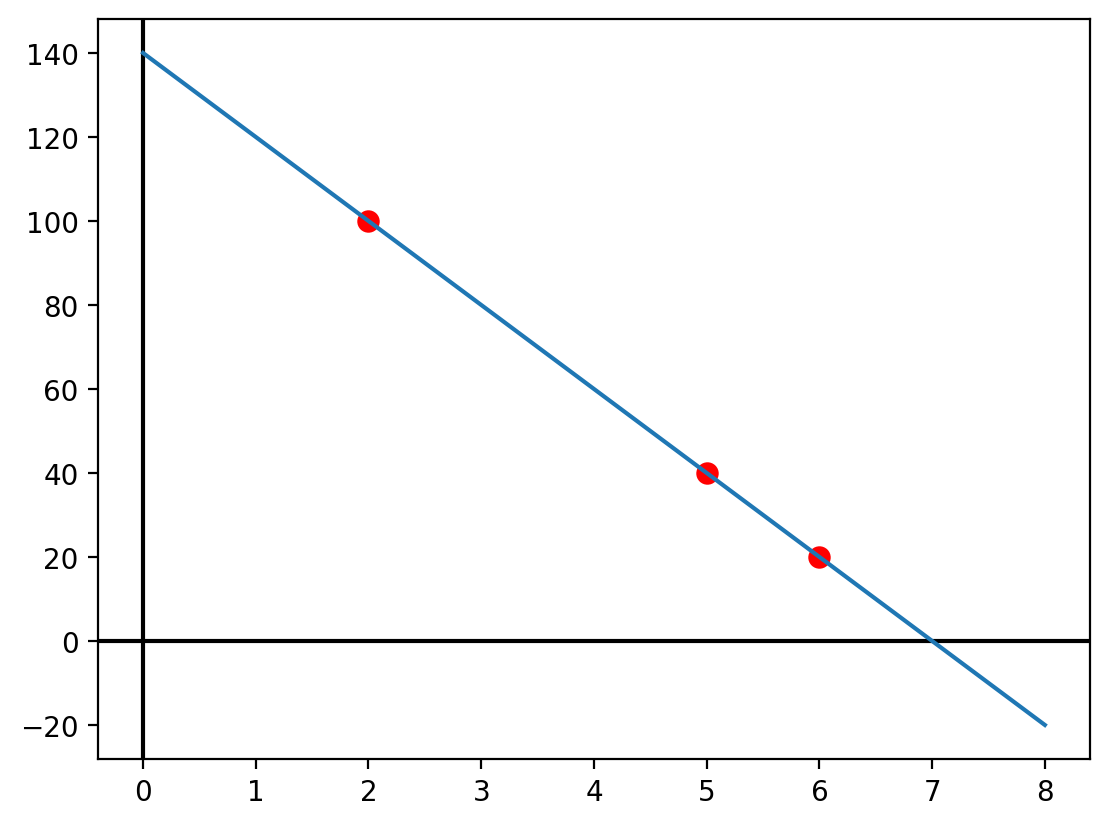

In [10]:
# 다음 세 케이스에 대한 정보를 그래프로 그리기
"""
1. 사용연수가 2년인 맥북의 중고가: 100만 원; Parameter --> (2, 100)
2. 사용연수가 5년인 맥북의 중고가: 40만 원; Parameter --> (5, 40)
3. 사용연수가 6년인 맥북의 중고가: 20만 원; Parameter --> (6. 20)
"""
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

In [11]:
# 비선형 데이터 (plt.scatter(macbook['used_years'], macbook['price'])로 출력했던 데이터 분포)
# 의 최적화 함수 구현하기; 목표: 최적값 출력

# Weight (w), Bias (b) 를 다음과 같이 설정
w = 3.1
b = 2.3

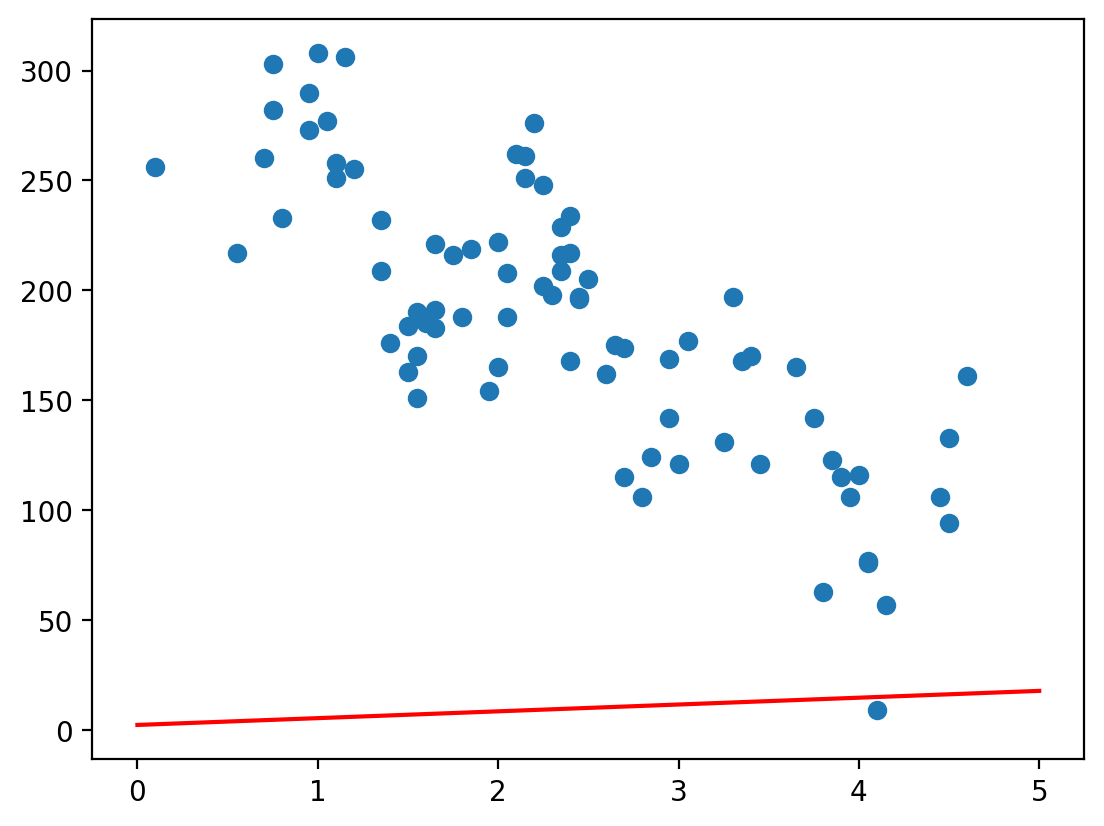

In [12]:
# 임의로 설정한 w, b 값과 데이터(x)를 그래프로 가시화해보기
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [13]:
# 사용년수(used_years) 확인
x = macbook["used_years"].values
x

array([2.65, 3.8 , 0.95, 4.5 , 4.45, 2.7 , 3.05, 2.25, 2.3 , 1.85, 1.5 ,
       0.95, 2.6 , 0.55, 2.05, 0.75, 3.95, 2.8 , 2.05, 1.15, 1.35, 3.35,
       1.35, 2.45, 2.4 , 0.1 , 3.45, 2.35, 0.7 , 1.05, 1.75, 4.1 , 4.5 ,
       4.  , 2.  , 2.45, 2.5 , 2.1 , 3.  , 4.05, 2.7 , 2.15, 3.3 , 2.4 ,
       2.85, 1.65, 1.55, 2.15, 3.4 , 1.55, 0.8 , 2.95, 2.4 , 1.4 , 1.65,
       2.25, 3.85, 3.9 , 4.6 , 2.35, 4.05, 1.2 , 1.95, 1.6 , 2.  , 1.8 ,
       3.75, 3.65, 2.35, 2.2 , 1.  , 4.15, 1.1 , 1.55, 2.95, 1.5 , 1.65,
       1.1 , 3.25, 0.75])

In [14]:
# 사용년수를 데이터로하는 모델을 동작시켜 예측값(prediction) 확인
prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [15]:
# 예측값을 기존 dataframe에 추가하여 비교하기
macbook['prediction'] = prediction
macbook.head()

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


In [16]:
# 예측값과 데이터값의 차이를 error로 명시하여 dataframe에 포함시켜보기
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


In [17]:
"""
`모델이 얼마나 틀렸는지를 평가하는 지표`로 사용되는 것들
- MAE : Mean Absolute Error, 오차의 절댓값의 평균
- MSE : Mean Squared Error, 오차의 제곱의 평균
- RMSE : Root Mean Squared Error, MSE의 제곱근
- R-squared : Coefficient of Determination, 결정 계수
"""

# 두 개의 값에 대한 차이를 구하는 RMSE 함수 선언
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

In [19]:
# 다시 예측값을 구해 RMSE 수행해보기
# 예측값 구하기
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


In [20]:
# RMSE 수행
rmse = RMSE(predictions, y)
rmse

188.81322969819274

In [21]:
# RMSE를 활용하여 손실(loss)함수 선언
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

In [22]:
# 손실함수를 활용하여 경사하강법 함수 선언; delta_x는 0에 무한히 가까워지는 극한 값이지만, 여기서는 0.0001로 가정
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

In [23]:
# 경사하강법의 학습률을 상수로 세팅하여 테스트함; 이렇게 미리 사람이 정한 파라미터를 하이퍼 파라미터라고 함
LEARNING_RATE = 1

In [ ]:
"""
전체 flow의 기본은 다음과 같음

1. 입력 데이터 x와 정답 데이터 y준비
2. 초기 w, b를 랜덤하게 선택
3. 현재의 w, b로 모델의 prediction 예측; 예측값(y)과 데이터값을 비교해서 손실함수 계산
4. 손실함수값을 계산하면서 동시게 그 점에서의 기울기(gradient)를 계산
5. 계산된 gradient를 확용해서 w_prime = w - ηg, b_prime = b - ηg 로 업데이트
6. 3 ~ 5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복
"""

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


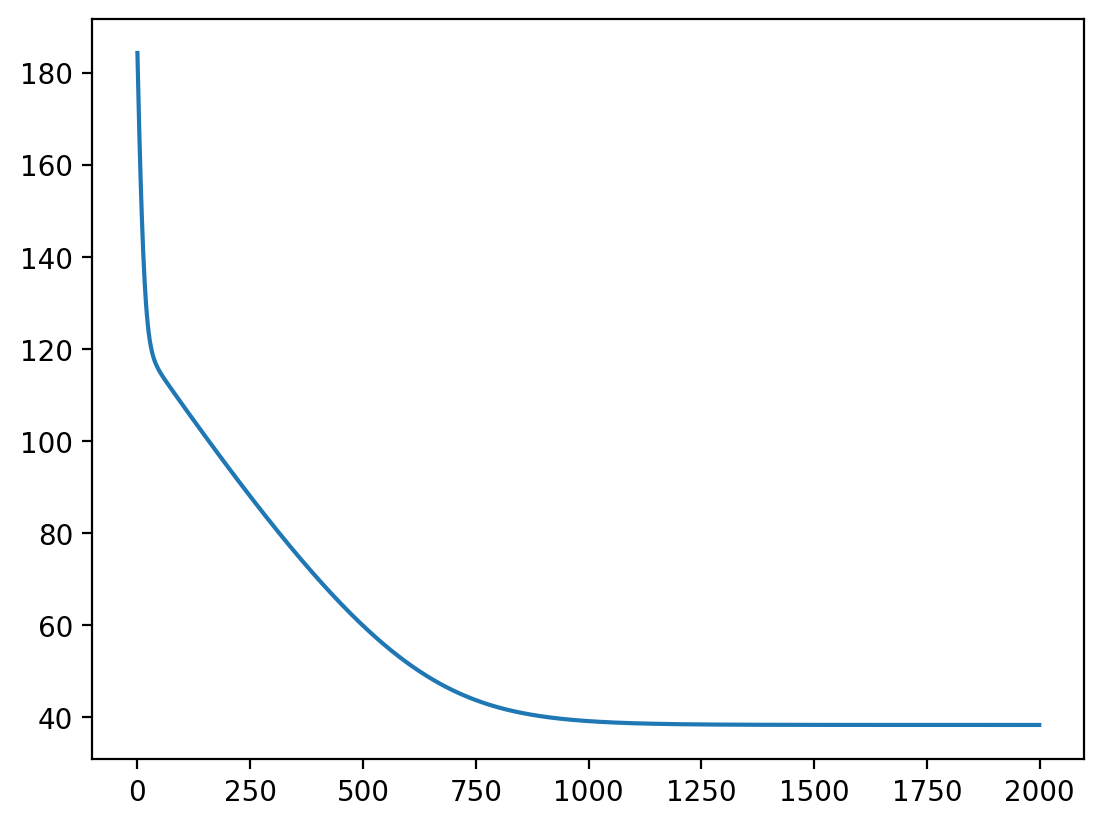

In [24]:
# 1. 입력 데이터 x와 정답 데이터 y준비
x = macbook["used_years"].values
y = macbook["price"].values

# 2. 초기 w, b를 랜덤하게 선택
w = 3.1
b = 2.3

## 단계별 손실함수 값 저장하는 리스트 선언
losses = []

# 3 ~ 5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

# 모든 loss 값 그래프로 확인
plt.plot(losses)
plt.show()

In [25]:
# 학습 이후의 파라미터 값 확인
w, b

(-44.92756090768412, 293.0815786721102)

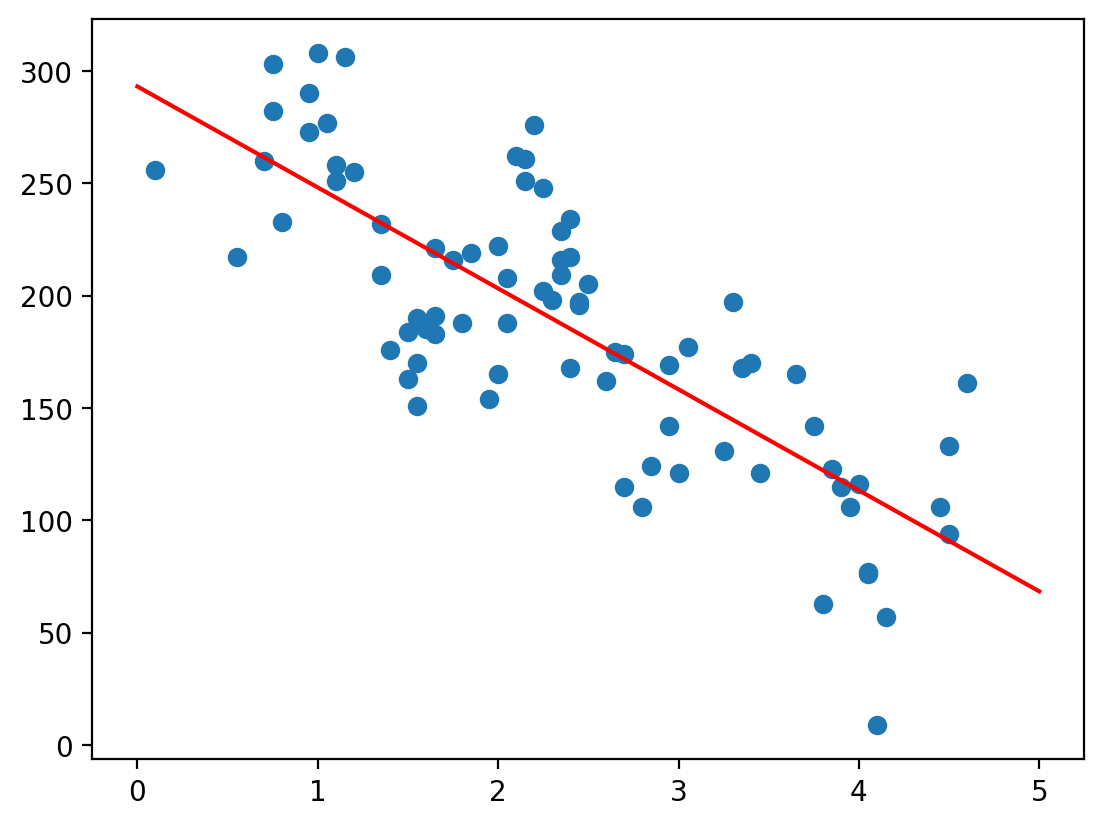

In [26]:
## 원레 데이터와 학습이 완료된 모델을 모두 활용하여 일차함수 그려보기

# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [27]:
# 새로운 데이터(macbook_test.csv) 확인하기
test = pd.read_csv("~/Desktop/study_record_of_aiffel/EXPLORATION_RS5/data/macbook_test.csv")
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [28]:
# 테스트 데이터를 test_x, test_y에 저장
test_x = test['used_years'].values
test_y = test['price'].values

In [29]:
# test_x를 통해 나온 예측값 확인하기
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


In [30]:
# 오차값(error) 계산하여 dataframe에 붙여보기
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


In [31]:
# test_x를 기반으로 RMSE 구하기
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

45.03918284717212

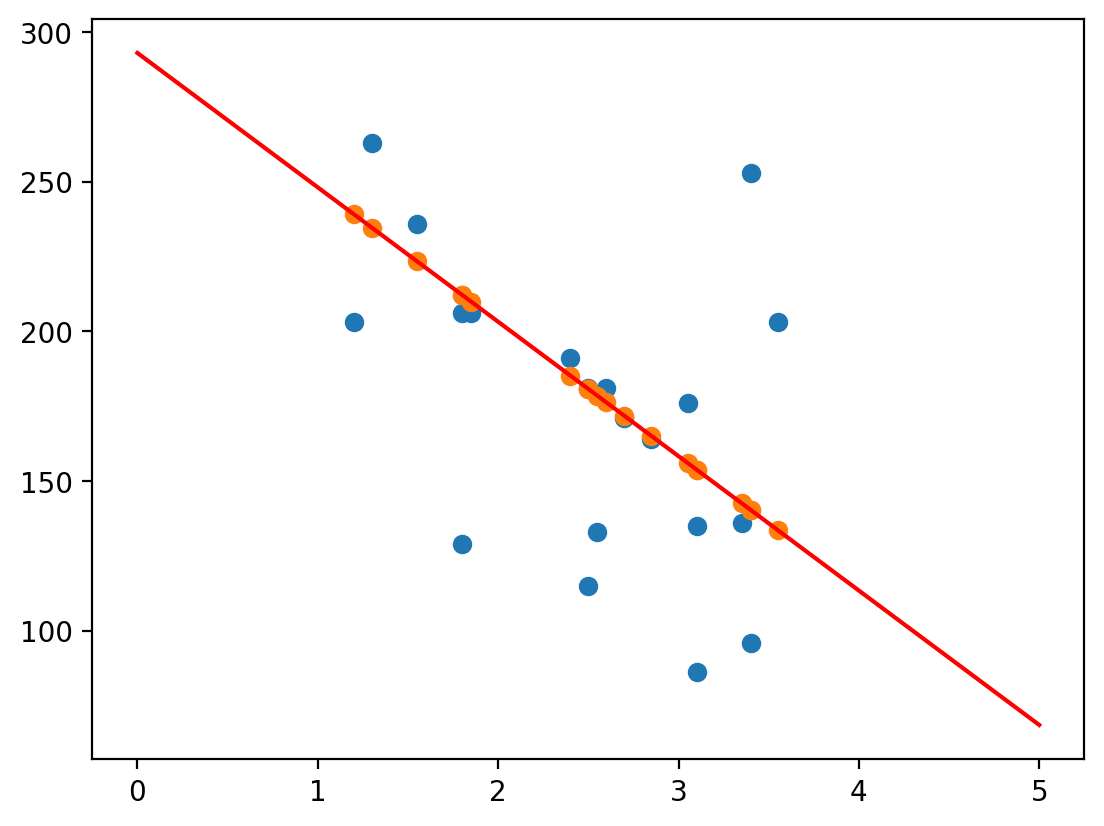

In [32]:
# test_x 데이터로 rmse, 오차값 등 검증하기
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()